https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=3

In [200]:
from IPython.display import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn.functional as F # Used for 1-Hot encoding

In [201]:
words=open('names.txt','r').read().splitlines()
words[:10],len(words)

(['emma',
  'olivia',
  'ava',
  'isabella',
  'sophia',
  'charlotte',
  'mia',
  'amelia',
  'harper',
  'evelyn'],
 32033)

In [202]:
# find shortest word
# make a list that contains all lengths
shortest_word=min([len(x) for x in words])
longest_word=max([len(x) for x in words])
shortest_word,longest_word

(2, 15)

# Build a bigram language model

### 2 char at a time and which is likely to follow

In [203]:
# take a single word, and look at 2 chars at a time, 
# sliding it through the word
for w in words[:3]: # first 3 words
    w=['<S>']+list(w)+['<E>'] # list(w) will have individual chars in the list
    for idx in range(0, len(w)-1):
        bigram=w[idx]+w[idx+1]
        print(bigram)
    print('\n')

<S>e
em
mm
ma
a<E>


<S>o
ol
li
iv
vi
ia
a<E>


<S>a
av
va
a<E>




In [204]:
# ALL bigrams
all_bigrams=[]
for w in words: # first 3 words
    w=['.']+list(w)+['.'] # list(w) will have individual chars in the list
    for idx in range(0, len(w)-1):
        bigram=w[idx]+w[idx+1]
        all_bigrams.append(bigram)

print(f"number of bigrams ={len(all_bigrams)}")

number of bigrams =228146


In [205]:
# Writer a function that lists all the bigrams of a given name <S> & <E> replaced with '.' as seen later.
def bigram_of_name(name):
    bigram=[]
    w=['.']+list(name)+['.']
    for idx in range(0, len(w)-1):
        bigram.append(w[idx]+w[idx+1])
    return bigram 
print(bigram_of_name('emma')) 

['.e', 'em', 'mm', 'ma', 'a.']


### we will count how often each bigram occur in the dataset (in the training set, to be more specific)

In [206]:
# create a dictionary that maintains a count of these bigrams
bigram_dict={}
for w in words[:3]: # first 3 words
    w=['<S>']+list(w)+['<E>'] # list(w) will have individual chars in the list
    for idx in range(0, len(w)-1):
        bigram=(w[idx],w[idx+1])
        if bigram in bigram_dict.keys():
            bigram_dict[bigram]+=1
        else:
            bigram_dict[bigram]=1

In [207]:
# another way to do the same thing is by getting the key.
# if key exists then increment
for w in words: # ALL words
    w=['<S>']+list(w)+['<E>'] # list(w) will have individual chars in the list
    for idx in range(0, len(w)-1):
        bigram=(w[idx],w[idx+1])
        bigram_dict[bigram]=bigram_dict.get(bigram,0)+1
bigram_dict

{('<S>', 'e'): 1532,
 ('e', 'm'): 770,
 ('m', 'm'): 169,
 ('m', 'a'): 2591,
 ('a', '<E>'): 6643,
 ('<S>', 'o'): 395,
 ('o', 'l'): 620,
 ('l', 'i'): 2481,
 ('i', 'v'): 270,
 ('v', 'i'): 912,
 ('i', 'a'): 2446,
 ('<S>', 'a'): 4411,
 ('a', 'v'): 835,
 ('v', 'a'): 643,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [208]:
# most-common-occurances is done by sorting on the values
# instead of reverse=True you can also use:
# sorted(bigram_dict.items(),key=lambda key_val:-key_val[1])
sorted(bigram_dict.items(),key=lambda key_val:key_val[1],reverse=True) # key_val[1] represents vlaues

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6643),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4411),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2591),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2481),
 (('i', 'a'), 2446),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1532),
 (('j', 'a'), 1473),
 (

# it's better to keep this in a 2D-array
ROW - 1st char of the bigram
COL - 2nd char of the bigram
ENTRY tells us how often the 2nd char follows the 1st

For this we will use PyTorch, but first, do this on a regular array

In [209]:
# The matrix dimension is determined by the number of unique chars
letters=open('names.txt','r').read()
letters=letters.replace('\n', '') # remove new line
letters_unique=list(set(letters))
letters_unique.sort()
letters_unique=letters_unique+['<S>']+['<E>']
letters_unique

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '<S>',
 '<E>']

In [210]:
# Each char is mapped to a number
char_mapping={}
for i in range(len(letters_unique)):
    #letters_unique[i]: i
    char_mapping[letters_unique[i]]=i
char_mapping

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [211]:
# initialize the matrix
rows, cols = (len(letters_unique), len(letters_unique))
bigram_matrix = [[0 for i in range(cols)] for j in range(rows)]
# convert matrix to np
bigram_matrix = np.array(bigram_matrix)

In [212]:
# iterate over every element in the dictionary and populate the matrix 
for x in bigram_dict.items():
    #print(x[0][0],x[0][1],x[1],char_mapping[x[0][0]],char_mapping[x[0][1]])
    bigram_matrix[char_mapping[x[0][0]]][char_mapping[x[0][1]]]=x[1]
bigram_matrix
# bigram_matrix[20][16],bigram_dict

array([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
        2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  835,
         161,  182, 2050,  435,    0, 6643],
       [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
         103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,
           0,    0,   83,    0,    0,  114],
       [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
         116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,
           0,    3,  104,    4,    0,   97],
       [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
          60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,
          23,    0,  317,    1,    0,  516],
       [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178,
        3248,  770, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,
          50,  132, 1070,  181,    0, 3983],
       [ 242,    0,    0,    0,  12

In [213]:
# convert the matrix into PyTorch
myN=torch.zeros((len(letters_unique),len(letters_unique)), dtype=int)
myN=torch.from_numpy(bigram_matrix)

# Back to the VIDEO

In [214]:
# Initialize
r_len=len(letters_unique)
c_len=r_len
N=torch.zeros((r_len,c_len), dtype=int)

### create the s2i dictionary (symbol to index)  
It is recreated later.

In [215]:
# create a map that takes each char/symbol and maps it to an index
chars = sorted(list(set(''.join(words))))
s2i = {k:v for v,k in enumerate(chars)}
s2i['<S>']=26
s2i['<E>']=27
s2i

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [216]:
# Populate the matrix from the initial "word"
for w in words:
    chs=['<S>']+list(w)+['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=s2i[ch1]
        ix2=s2i[ch2]
        N[ix1,ix2] +=1
N    

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [217]:
# to plot nicely, we first need a dictionary that maps i2s
i2s = {i:s for s,i in s2i.items()}
#i2s

(-0.5, 27.5, 27.5, -0.5)

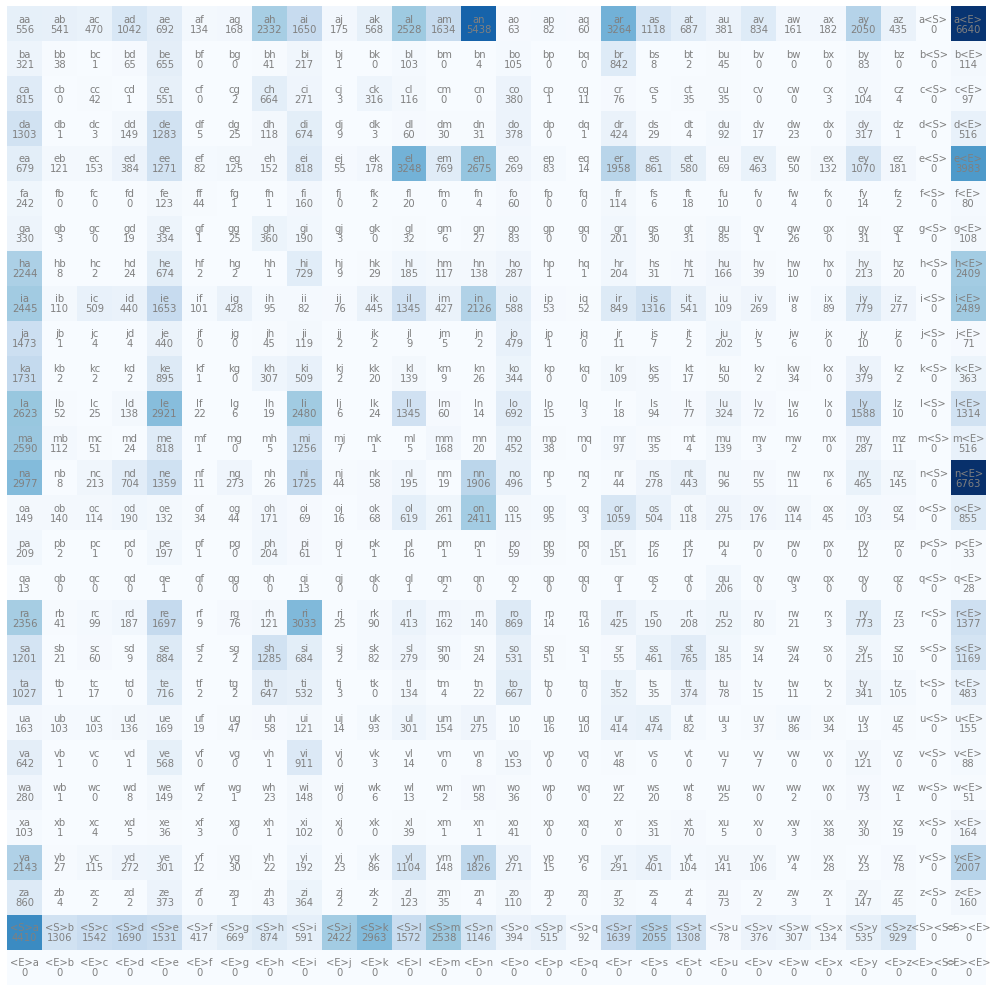

In [218]:
plt.figure(figsize=(18,18))
plt.imshow(N,cmap="Blues")
for i in range(r_len):
    for j in range(c_len):
        chstr=i2s[i]+i2s[j] # this is the bigram
        plt.text(j,i,chstr,ha="center", va="bottom", color="grey")
        plt.text(j,i,N[i,j].item(),ha="center", va="top", color="grey")
plt.axis('off')        

Note the 'always 0s' row and col, which makes sense, but it is wastful.  
Replace 'E' & 'S' with '.'  
RECREATE s2i

In [219]:
# create a map that takes each char/symbol and maps it to an index
chars = sorted(list(set(''.join(words))))
s2i = {k:v+1 for v,k in enumerate(chars)} # v+1 because '.' is 0
s2i['.']=0 # Change this to 0

r_len=len(chars)+1
c_len=r_len

N=torch.zeros((r_len,c_len), dtype=int)

# Populate the matrix from the initial "word"
for w in words:
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=s2i[ch1]
        ix2=s2i[ch2]
        N[ix1,ix2] +=1
N  

i2s = {i:s for s,i in s2i.items()}

(-0.5, 26.5, 26.5, -0.5)

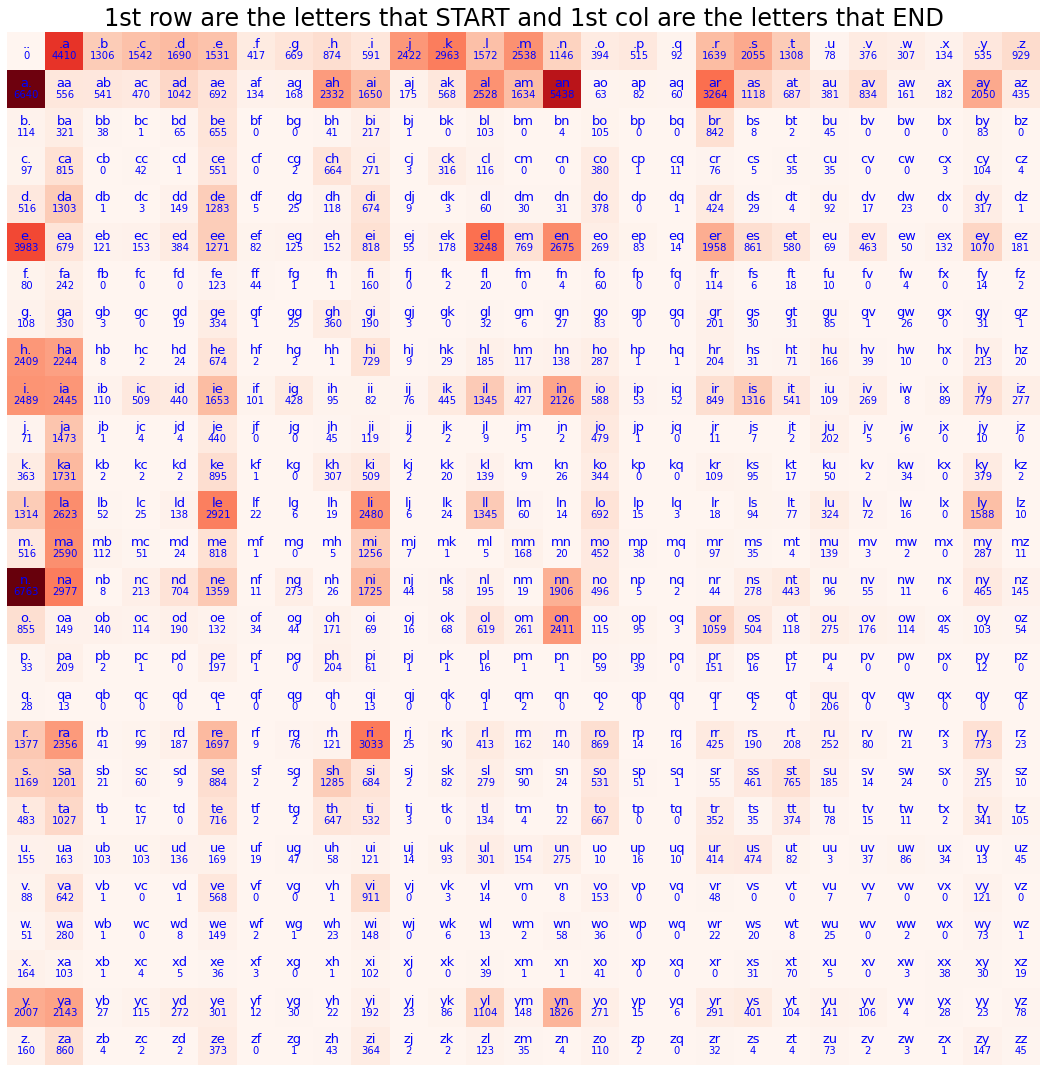

In [220]:
plt.figure(figsize=(19,19))
plt.imshow(N,cmap="Reds")
for i in range(r_len):
    for j in range(c_len):
        chstr=i2s[i]+i2s[j] # this is the bigram
        plt.text(j,i,chstr,ha="center", va="bottom", color="blue",fontsize=13)
        plt.text(j,i,N[i,j].item(),ha="center", va="top", color="blue")
        plt.title('1st row are the letters that START and 1st col are the letters that END', fontsize=24)
plt.axis('off')     

We will be sampling from this model.  
To sample the 1st char we sample from the 1st row - which starts with "."
And therefore the 2nd char would be the first letter.
Once a char is sampled, we know that it is the first letter of the next bigram.
And therefore sample from the row corresponding to this a bigram that starts with this letter.
For example: "emma" was split to ".e,em,mm,ma,a." 
Therefore, if you sample at random ".e", read the column number of this biagram
and then take a new sample from the row of all "e"s. If for instance you
get randomally the "em" biagram, read the column number of this biagram and then take a new sample from the row of all "m"s.... etc. -- UNTIL you get a letter from the first column, which corresponds to an END of a word. 

The counts in the 1st row tell us how often these biagrams start a word  
In order to sample, we convert the count to probabilities.

In [221]:
# Sample the first letter
p=N[0,:].float() # convert to float
p=p/p.sum() # p is a DISTRIBUTION
p,p.sum()

(tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]),
 tensor(1.))

We now need to sample from this distribution, so use TORCH.MULTINOMIAL

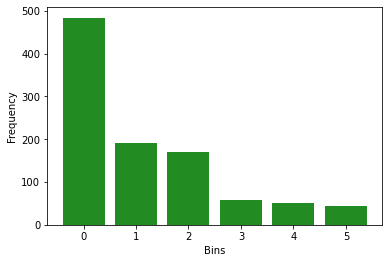

In [222]:
# unerstanding torch.multinomial
# suppose we have a tensor that represents unifor distribution of a die
g=torch.Generator().manual_seed(2147483647) # always the same results

test_unifor=torch.tensor([1/6,1/6,1/6,1/6,1/6,1/6]) # equal probability to get 0,1,2,3,4,5
test_unifor=torch.tensor([1/2,1/6,1/6,1/18,1/18,1/18])
sample_test_uniform=torch.multinomial(test_unifor, num_samples=1000,replacement=True,generator=g)
# plot a histogram
bins=6
hist = torch.histc(sample_test_uniform.float(), bins=bins, min=0, max=bins) # ???float required for the hist plot???
plt.bar(range(bins), hist, align='center', color=['forestgreen'])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

# Back to the video 33:00

To sample the 1st char we sample from the 1st row - which starts with "."
And therefore the 2nd char would be the first letter.
Once a char is sampled, we know that it is the first letter of the next bigram.
And therefore sample from the row corresponding to this a bigram that starts with this letter.
For example: "emma" was split to ".e,em,mm,ma,a." 
Therefore, if you sample at random ".e", read the column number of this biagram
and then take a new sample from the row of all "e"s. If for instance you
get randomally the "em" biagram, read the column number of this biagram and then take a new sample from the row of all "m"s.... etc. -- UNTIL you get a letter from the first column, which corresponds to an END of a word. 

In [223]:
g=torch.Generator().manual_seed(2147483647) # always the same results
# Sample the first letter and stop at the last lettr

for i in range(10):
    out=[]
    ix=0 # when ix=0 it means you SELECT the 1st ROW
    while (True):
        p=N[ix].float() # convert to float
        p=p/p.sum() # p is a DISTRIBUTION
        # print(p)
        # in the line below, CHOOSE a new ix, which would be a COL, but when it loops back it is a ROW.
        ix=torch.multinomial(p, num_samples=1,replacement=True,generator=g).item() # item() works for a SINGLE sample
        out.append(i2s[ix])
        if ix==0: # if ix==0 it means the the 1st COL was chosed, which would indicate END
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


Looking at the names above, they are not so good, because we sometime get for instance a single letter. That's because the 1st ix was some number, but the second ix was 0.

(35:26): But let's say all probabilities were the same.

In [224]:
N_equall_prob=torch.ones(27,27)*(1/27) # uniform distribution
N_equall_prob[0],N_equall_prob[0].sum()

for i in range(10):
    out=[]
    ix=0 # when ix=0 it means you SELECT the 1st ROW
    while (True):
        p=N_equall_prob[ix].float() # convert to float
        p=p/p.sum() # p is a DISTRIBUTION
        # print(p)
        # in the line below, CHOOSE a new ix, which would be a COL, but when it loops back it is a ROW.
        ix=torch.multinomial(p, num_samples=1,replacement=True,generator=g).item() # item() works for a SINGLE sample
        out.append(i2s[ix])
        if ix==0: # if ix==0 it means the the 1st COL was chosed, which would indicate END
            break
    print(''.join(out))

idcx.
cekmzucjnjoeovjvrggqrjr.
cfbhabkslpokc.
xtxwbpmknuusxdgzfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy.
gszpw.
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv.
lfstdqigvncdoidetsukgdp.
cfpjsxeqjcsmjwguzes.
woflfjxflylgbegpjdpovdtw.
dlzysqtrbhxhcdneiuum.


We see that the names are random random, so the bigram is much better than just random, but bigram is far from perfect ...

# (36:18) Fix inefficiencies, work with tensor, broadcasting etc.

In [225]:
# in the computation above we are always computing the probability p=p/p.sum().
# So instaed, create a matrix that holds all the pre-compted probabilities, 
# so when in the loop, just fetch the correct probability. 

In [226]:
N_sum=torch.sum(N,1,keepdim=True) # sum along rows
P=N/N_sum # Convertin COUNT to POBABILITIES

(-0.5, 26.5, 26.5, -0.5)

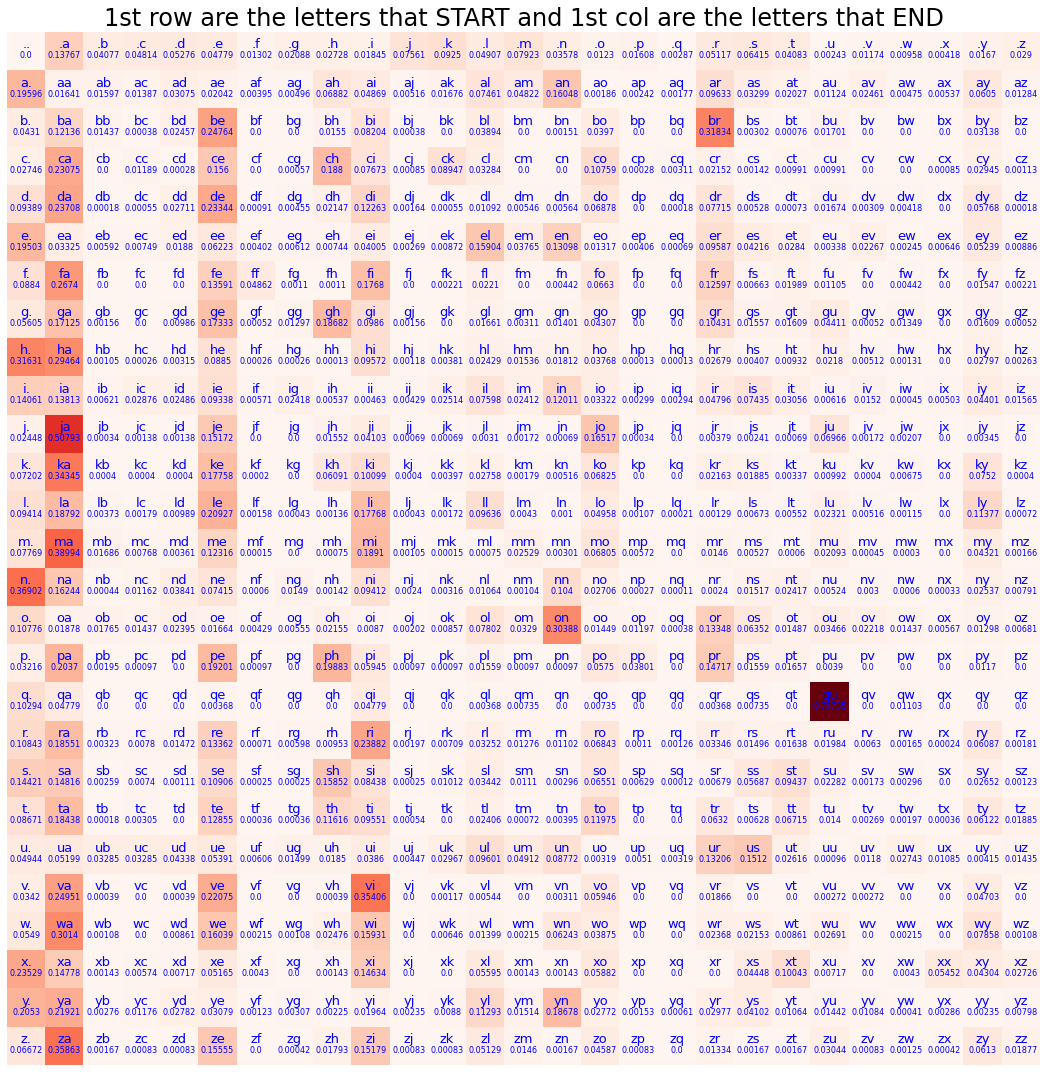

In [227]:
# PLOT
plt.figure(figsize=(19,19))
plt.imshow(P,cmap="Reds")
for i in range(r_len):
    for j in range(c_len):
        chstr=i2s[i]+i2s[j] # this is the bigram
        plt.text(j,i,chstr,ha="center", va="bottom", color="blue",fontsize=13)
        
        plt.text(j,i,round(P[i,j].item(),5),ha="center", va="top", color="blue",fontsize=8)
        
        plt.title('1st row are the letters that START and 1st col are the letters that END', fontsize=24)
plt.axis('off')  

In [228]:
# REGENERATE THE NAMES with the 'P' vecror.
g=torch.Generator().manual_seed(2147483647) # always the same results
# Sample the first letter and stop at the last lettr

for i in range(10):
    out=[]
    ix=0 # when ix=0 it means you SELECT the 1st ROW
    while (True):
        p=P[ix]
        # in the line below, CHOOSE a new ix, which would be a COL, but when it loops back it is a ROW.
        ix=torch.multinomial(p, num_samples=1,replacement=True,generator=g).item() # item() works for a SINGLE sample
        out.append(i2s[ix])
        if ix==0: # if ix==0 it means the the 1st COL was chosed, which would indicate END
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


### (50:50) We would like to eveluate how good is this model in terms of predicting the training set.  
So a training LOSS is a single number that measures the quality of this prediction such that when LOSS=0 then the model makes a perfect preiction.

In [229]:
# To better understand this, let's say you want to find out the probability of getting any name.

def find_prob_of_name(my_name):
    # get the bigrams for this name
    log_likelyhood=0
    bigrams_of_my_name=bigram_of_name(my_name) # a list containing the bigrams
    for i in range(len(bigrams_of_my_name)):
        row_idx=s2i[bigrams_of_my_name[i][0]] # 1st letter
        col_idx=s2i[bigrams_of_my_name[i][1]] # 2nd letter
        log_likelyhood += torch.log(P[row_idx,col_idx]) # calculate the log-likelyhood
        print(bigrams_of_my_name[i],torch.log(P[row_idx,col_idx]))
    return  -log_likelyhood/len(bigrams_of_my_name) # normalize bu the count
   
print(find_prob_of_name('andrej'))


.a tensor(-1.9829)
an tensor(-1.8296)
nd tensor(-3.2594)
dr tensor(-2.5620)
re tensor(-2.0127)
ej tensor(-5.9171)
j. tensor(-3.7098)
tensor(3.0391)


The log_likelyhood of all the names is:

In [230]:
log_likelyhood=0
for i in range(len(all_bigrams)):
        row_idx=s2i[all_bigrams[i][0]] # 1st letter
        col_idx=s2i[all_bigrams[i][1]] # 2nd letter
        log_likelyhood += torch.log(P[row_idx,col_idx]) # calculate the log-likelyhood
        # print(all_bigrams[i],torch.log(P[row_idx,col_idx]))
print(-log_likelyhood/len(all_bigrams))

print(f"The log_likelyhood of all the names is: {-log_likelyhood/len(all_bigrams)}")

tensor(2.4541)
The log_likelyhood of all the names is: 2.454094171524048


### We can use the negative-log-likelyhood (nll) as a LOSS function, as demonstrated in the function: "find_prob_of_name".  The lower it is, the better. We need to find the parameters that minimize the nll-Loss. 

### GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
### equivalent to maximizing the log likelihood (because log is monotonic)
### equivalent to minimizing the negative log likelihood
### equivalent to minimizing the average negative log likelihood

### log(a*b*c) = log(a) + log(b) + log(c)

In [231]:
# If you try a name with a bigram that has 0% probability, then the result is INFINITY.
# what this means is that even though this name is somewhat likely, the model has ZERO chance of predicting it.
print(find_prob_of_name('andrejq'))

.a tensor(-1.9829)
an tensor(-1.8296)
nd tensor(-3.2594)
dr tensor(-2.5620)
re tensor(-2.0127)
ej tensor(-5.9171)
jq tensor(-inf)
q. tensor(-2.2736)
tensor(inf)


### Smoothing N_smooth

In [232]:
# To fix this issue, do "model smoothing" - which adds fake counts, in this case a count of '1' to everything.
# The more you add, the more the distributin will tends towards a uniform distribution, 
# because adding for instance a very large number would swamp the actual counts.

N_smooth=N+1
N_smooth_sum=torch.sum(N_smooth,1,keepdim=True) # sum along rows
P=N_smooth/N_sum # Convertin COUNT to POBABILITIES ==> Overwrite 'P'

In [233]:
print(find_prob_of_name('andrejq'))

.a tensor(-1.9827)
an tensor(-1.8294)
nd tensor(-3.2579)
dr tensor(-2.5597)
re tensor(-2.0122)
ej tensor(-5.8991)
jq tensor(-7.9725)
q. tensor(-2.2385)
tensor(3.4690)


# (1:05) ... finish writing
# ------------------------------------------  
The way we arrived at this model was by doing something sensible, which is doing counts, and then normalizing them.  
# Alternative Approach which will case the bigram mideling into a neural-network framework:  
The nn will receive a single char as an input, and it will output the probability distribution of a next char in a sequence.  I.e., it will make guesses as to the likelyhood of what is the next char. We will be able to evaluate any setting of the parameters by examining the Loss function.  
## -------------------------------------------


# Logistic Regression
https://www.youtube.com/watch?v=z9XAXXGwUzM
### First step is to create the training set

In [234]:
# create the training set on 1st word
xs,ys=[],[]

for w in words[:1]: # 1st word
    w=['.']+list(w)+['.'] # list(w) will have individual chars in the list
    for idx in range(0, len(w)-1):
        ix1=s2i[w[idx]]      # index of 1st letter of the bigram
        ix2=s2i[w[idx+1]]    # index of 2nd letter of the bigram
        xs.append(ix1)
        ys.append(ix2)
        print(w[idx],w[idx+1]," ",ix1,ix2)

# convert to a tensor
xs=torch.tensor(xs)
ys=torch.tensor(ys)

. e   0 5
e m   5 13
m m   13 13
m a   13 1
a .   1 0


The NN will work as follows (for EMMA):  
1st char with idx=0 is the INPUT.    
NN is expected to get an OUTPUT (desired LABEL) of 5 with high probability... etc.  
So there are 5 seperate input for this data set.  

### (1:10:00) So how do we feed-in this to a NN?  
Since at the output we want to predict a single CHAR among 27 other CHARs, then the output layer can consist of 27 1-hot encoded outputs, and the input should also be encoded to 1-hot.

(<matplotlib.image.AxesImage at 0x1e22f58f460>,
 torch.Size([5, 27]),
 torch.float32)

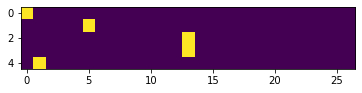

In [235]:
# 1-hot encode, and since you feedin to a NN, cast it to float
xenc=F.one_hot(xs, num_classes=27).float()
plt.imshow(xenc),xenc.shape,xenc.dtype

In [236]:
W=torch.randn((27,27)) # initial random weights from a normal-distribution.
# 27 neurons
# 1st letter in xs is xenc[0]
out_1_letter=xenc[0] @ W 
out_1_letter,out_1_letter.shape

(tensor([ 2.0759, -1.4934,  0.0744,  1.0959, -1.3033,  0.9739,  1.3804, -1.4769,
          0.0773,  0.5629,  0.5188, -0.1644,  0.0581, -0.2678,  1.1030, -0.5341,
          0.6935, -0.2879,  0.1229,  1.5646, -0.9437,  0.3761,  1.6453, -0.2817,
         -0.6149, -1.1448,  1.2928]),
 torch.Size([27]))

In [237]:
# Do a batch where all 5 inputs are applied
# [5x27] @ [27x27] = [5x27]
out_5_letter=xenc @ W
out_5_letter.shape

torch.Size([5, 27])

In [238]:
# every element in the out_5_letter tells us that every one of
# 27 neurons that we created, what is the firing rate on everyone 
# of these example. example:

out_5_letter[3,13], xenc[3]@W[:,13], (xenc[3] * W[:,13]).sum()
# tells you the rate of the 13th neuron looking at the 3rd input. 

(tensor(0.0032), tensor(0.0032), tensor(0.0032))

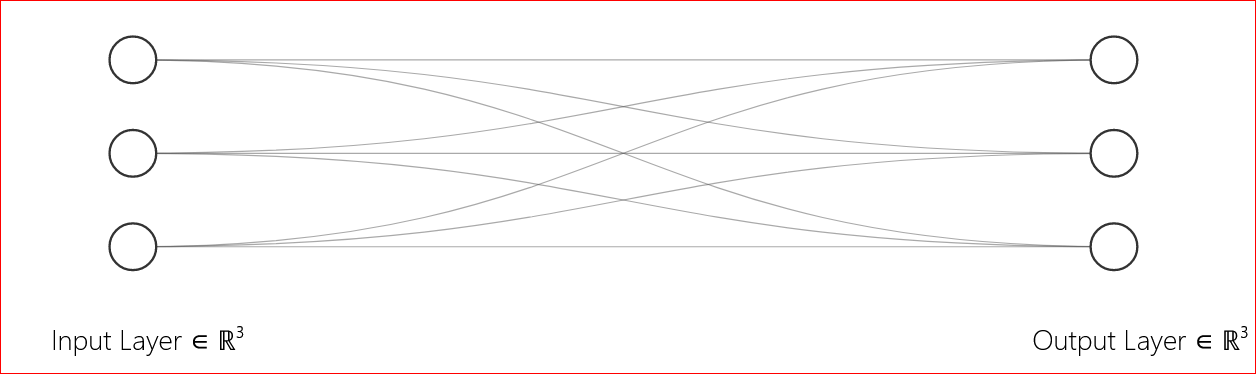

In [239]:
Image("nn_3.PNG")

The drawing illustrates the procedure.  
The input layer (27 nodes) is a single 1-hot encoded letter.  
Each node in the output layer outputs the weighted sum as shown.  
 Example:  
Input [1,0,1] - Row dim=(1,3)  
Weights for the first output node [0.1,0.2,0.3] - Col dim=(3,1)  
The output of 1st output node is a DOT Product such that: 1 * 0.1+0 * 0.2+1 * 0.3=0.4.  

To compute all 3 outputs, the Weights should have dim=(3,3) where each column corresponds to weights associated the 3 output nodes.

https://www.youtube.com/watch?v=DPSXVJF5jIs
# How do we interpret the outputs?  
The goal is to get a probability distribution that will predict the next char.  
The outputs now are numbers that are positive/negative - but what we want is something similar to the N-matrix (counts).  
The counts are INT, and the NN is not outputing integers.
We cannot have the NN output probabilities since prob is from 0 to 1.  

So interpret the output as log-counts -- and to get back to "Counts", Exponentiate.  
Exponentiation will output Negative numbers as numbers from 0=>1 and Positive numbers as even larger numbers.  
So the exponentiated numbers are the equivalent of COUNTS.

In [240]:
# logits = log-counts
logits_5 = out_5_letter
counts_5 = logits_5.exp() # Equivalent to the N_smooth
# probabilit is just the COUNTS, normalized.
probs_5=counts_5/counts_5.sum(1,keepdims=True) # every ROW sums to '1'

## These last 2 lines are called soft-max:

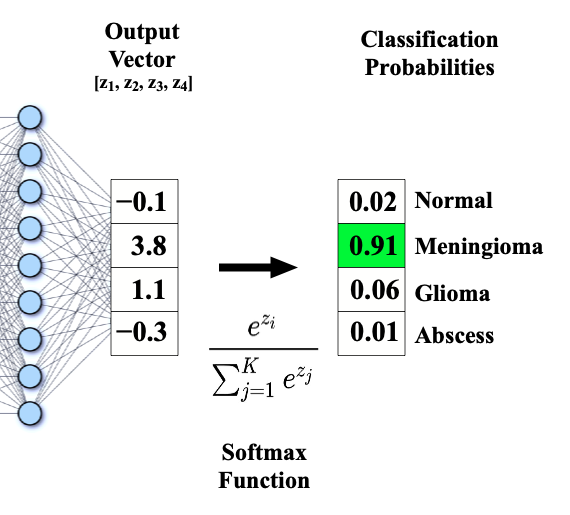

In [241]:
Image("softmax-example_orig.png")

### So the probability will change as we tune the WEIGHTS, but we will tune the Weights to get the desired Label (output).
### Since everything in te forward path is differentiable, we can back propegate.

In [242]:
probs_5

tensor([[0.1559, 0.0044, 0.0211, 0.0585, 0.0053, 0.0518, 0.0778, 0.0045, 0.0211,
         0.0343, 0.0329, 0.0166, 0.0207, 0.0150, 0.0589, 0.0115, 0.0391, 0.0147,
         0.0221, 0.0935, 0.0076, 0.0285, 0.1014, 0.0148, 0.0106, 0.0062, 0.0713],
        [0.0648, 0.0103, 0.0082, 0.0067, 0.0432, 0.0573, 0.0191, 0.0037, 0.0164,
         0.0027, 0.0066, 0.0512, 0.0151, 0.0729, 0.0036, 0.0368, 0.0200, 0.0978,
         0.0236, 0.0088, 0.0072, 0.0028, 0.3243, 0.0153, 0.0190, 0.0373, 0.0252],
        [0.0591, 0.0228, 0.0171, 0.0501, 0.0148, 0.0312, 0.0069, 0.0353, 0.0446,
         0.0395, 0.0050, 0.0428, 0.0580, 0.0416, 0.0040, 0.0406, 0.0348, 0.0702,
         0.0644, 0.0070, 0.0183, 0.0776, 0.0262, 0.0681, 0.0384, 0.0266, 0.0550],
        [0.0591, 0.0228, 0.0171, 0.0501, 0.0148, 0.0312, 0.0069, 0.0353, 0.0446,
         0.0395, 0.0050, 0.0428, 0.0580, 0.0416, 0.0040, 0.0406, 0.0348, 0.0702,
         0.0644, 0.0070, 0.0183, 0.0776, 0.0262, 0.0681, 0.0384, 0.0266, 0.0550],
        [0.0172, 0.0433,

# (1:26:00) Computing the LOSS -- Redo the above with a fixed seed for repeatability

In [243]:
# INPUT DATA SET
xs,ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [244]:
# Generate Weights
g=torch.Generator().manual_seed(2147483647)
# initial random weights from a normal-distribution.
# requires_grad tells pytorch that we are interested in calculating Gradients (later in loss.backward())
W=torch.randn((27,27),generator=g, requires_grad=True) 

In [245]:
# FORWARD PASS
logits=xenc @ W
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)

In [246]:
# NO LOOP:
# 1st letter in the bigram has index xs[0] -- corresponding to "."
# Next letter is ys[0] -- corresponding to "e"
# The probability of "e" following "." is probs[0][5]
probs[0],probs[0][5],-torch.log(probs[0][5]) 

(tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        grad_fn=<SelectBackward0>),
 tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(4.3993, grad_fn=<NegBackward0>))

In [247]:
# 2nd letter is x[5], next letter is y[13], with probability of:
probs[1],probs[1][13],-torch.log(probs[1][13])

(tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(4.0146, grad_fn=<NegBackward0>))

In [248]:
# Put this into a loop, and the loop count is 5 because there are 5 predictions for the name "emma"
nlls=torch.zeros(5) # Neural network loss
for i in range(5):
    print(probs[i][ys[i]],-torch.log(probs[i][ys[i]]))
    nlls[i]=-torch.log(probs[i][ys[i]])
print(f"\n Average negative log likelihood, i.e. LOSS is {nlls.mean().item()}") 


tensor(0.0123, grad_fn=<SelectBackward0>) tensor(4.3993, grad_fn=<NegBackward0>)
tensor(0.0181, grad_fn=<SelectBackward0>) tensor(4.0146, grad_fn=<NegBackward0>)
tensor(0.0267, grad_fn=<SelectBackward0>) tensor(3.6234, grad_fn=<NegBackward0>)
tensor(0.0737, grad_fn=<SelectBackward0>) tensor(2.6081, grad_fn=<NegBackward0>)
tensor(0.0150, grad_fn=<SelectBackward0>) tensor(4.2012, grad_fn=<NegBackward0>)

 Average negative log likelihood, i.e. LOSS is 3.7693049907684326


In [249]:
# (1:36:40): 
# We need probs[0,5],probs[0,13],probs[0,13],probs[0,1],probs[0,0]
# An efficient way to access these probabilities:
loss=-probs[torch.arange(5),ys].log().mean()

In [250]:
# The forward path with loss is copied here:
# FORWARD PASS
logits=xenc @ W
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)
loss=-probs[torch.arange(5),ys].log().mean()
print("Loss =",loss.item())

Loss = 3.7693049907684326


# Backward Pass (1:39:00)

In [251]:
# Backward pass
W.grad=None # initialize
# Zero grad

loss.backward()


In [252]:
W.shape,W.grad.shape, W.grad[0]
# A number in W.grad tells us th einfluance of that weight o the Loss Function.
# A positive num, such as W.grad[0,1] is telling us that W[0,0] nudged by the gradient would increase the loss.

(torch.Size([27, 27]),
 torch.Size([27, 27]),
 tensor([ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292]))

In [253]:
W[0,0],W.grad[0,0]

(tensor(1.5674, grad_fn=<SelectBackward0>), tensor(0.0121))

In [254]:
# use the gradient information to UPDATE the weights
W.data += -0.1 * W.grad

In [255]:
# Since the Weights are updated, we expect the loss to decrease:
print("Loss =",loss.item())
logits=xenc @ W
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)
loss=-probs[torch.arange(5),ys].log().mean()
print("Loss =",loss.item())

Loss = 3.7693049907684326
Loss = 3.7492127418518066


In [256]:
# Loop 
for k in range(10):
    logits=xenc @ W
    counts=logits.exp()
    probs=counts/counts.sum(1,keepdims=True)
    loss=-probs[torch.arange(5),ys].log().mean()
    
    W.grad=None # initialize
    loss.backward()
    
    W.data += -0.1 * W.grad
    
    print("Loss =",loss.item())

Loss = 3.7492127418518066
Loss = 3.7291626930236816
Loss = 3.7091541290283203
Loss = 3.6891887187957764
Loss = 3.6692662239074707
Loss = 3.6493873596191406
Loss = 3.629552125930786
Loss = 3.6097614765167236
Loss = 3.5900158882141113
Loss = 3.5703155994415283


### Run on all words (1:43:00)

In [257]:
# create the training set on ALL word
xs,ys=[],[]

for w in words: # 1st word
    w=['.']+list(w)+['.'] # list(w) will have individual chars in the list
    for idx in range(0, len(w)-1):
        ix1=s2i[w[idx]]      # index of 1st letter of the bigram
        ix2=s2i[w[idx+1]]    # index of 2nd letter of the bigram
        xs.append(ix1)
        ys.append(ix2)
        #print(w[idx],w[idx+1]," ",ix1,ix2)

# convert to a tensor
xs=torch.tensor(xs)
ys=torch.tensor(ys)
num=xs.shape[0]

In [258]:
xenc=F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([228146, 27])

In [259]:
# Reinitialize Weights
# Generate Weights
g=torch.Generator().manual_seed(2147483647)
# initial random weights from a normal-distribution.
# requires_grad tells pytorch that we are interested in calculating Gradients (later in loss.backward())
W=torch.randn((27,27),generator=g, requires_grad=True) 

In [260]:
# Loop 
learning_rate=50
for k in range(100):
    logits=xenc @ W
    counts=logits.exp()
    probs=counts/counts.sum(1,keepdims=True)
    loss=-probs[torch.arange(num),ys].log().mean()
    
    W.grad=None # initialize
    loss.backward()
    
    W.data += -learning_rate * W.grad
    
    print("Loss =",loss.item())

Loss = 3.758953332901001
Loss = 3.371100664138794
Loss = 3.154043197631836
Loss = 3.020373582839966
Loss = 2.927711248397827
Loss = 2.8604023456573486
Loss = 2.8097290992736816
Loss = 2.7701022624969482
Loss = 2.7380728721618652
Loss = 2.711496353149414
Loss = 2.6890029907226562
Loss = 2.6696884632110596
Loss = 2.6529300212860107
Loss = 2.638277292251587
Loss = 2.6253881454467773
Loss = 2.613990545272827
Loss = 2.60386323928833
Loss = 2.5948216915130615


Loss = 2.5867116451263428
Loss = 2.579403877258301
Loss = 2.572789192199707
Loss = 2.5667762756347656
Loss = 2.5612878799438477
Loss = 2.5562589168548584
Loss = 2.551633834838867
Loss = 2.547366142272949
Loss = 2.543415069580078
Loss = 2.5397486686706543
Loss = 2.5363364219665527
Loss = 2.5331544876098633
Loss = 2.5301806926727295
Loss = 2.5273969173431396
Loss = 2.5247862339019775
Loss = 2.522334575653076
Loss = 2.520028829574585
Loss = 2.517857789993286
Loss = 2.515810966491699
Loss = 2.513878345489502
Loss = 2.512052059173584
Loss = 2.510324001312256
Loss = 2.5086867809295654
Loss = 2.5071346759796143
Loss = 2.5056614875793457
Loss = 2.5042612552642822
Loss = 2.502929210662842
Loss = 2.5016613006591797
Loss = 2.5004520416259766
Loss = 2.4992988109588623
Loss = 2.498197317123413
Loss = 2.497144937515259
Loss = 2.496137857437134
Loss = 2.495173692703247
Loss = 2.4942495822906494
Loss = 2.493363380432129
Loss = 2.4925127029418945
Loss = 2.4916954040527344
Loss = 2.4909095764160156
Loss

### What Loss should we expect:
The log_likelyhood of all the names is: 2.4515998363494873 (See Above "all_bigrams")  
With gradient optimization we get the same LOSS as we got when we computed it by using counting.

# Sampling from the NN

Sampling from the count model

In [261]:
# REGENERATE THE NAMES with the 'P' vecror.
g=torch.Generator().manual_seed(2147483647) # always the same results
# Sample the first letter and stop at the last lettr

for i in range(5):
    out=[]
    ix=0 # when ix=0 it means you SELECT the 1st ROW
    while (True):
        p=P[ix]
        # in the line below, CHOOSE a new ix, which would be a COL, but when it loops back it is a ROW.
        ix=torch.multinomial(p, num_samples=1,replacement=True,generator=g).item() # item() works for a SINGLE sample
        out.append(i2s[ix])
        if ix==0: # if ix==0 it means the the 1st COL was chosed, which would indicate END
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


Sampling from the NN  
Now p will come from the neural net, not from 'P'

In [264]:
g=torch.Generator().manual_seed(2147483647)
for i in range(5):
    out=[]
    ix=0 # when ix=0 it means you SELECT the 1st ROW
    while (True):
        xenc=F.one_hot(torch.tensor([ix]), num_classes=27).float() # Encode ix as one-hot
        logits=xenc @ W #The W is the final W after gradient-descent has completed
        counts=logits.exp()
        p=counts/counts.sum(1,keepdims=True)
        
        ix=torch.multinomial(p, num_samples=1,replacement=True,generator=g).item() # item() works for a SINGLE sample
        out.append(i2s[ix])
        if ix==0: # if ix==0 it means the the 1st COL was chosed, which would indicate END
            break
    print(''.join(out))

mor.
axwaninaymoryles.
kondmaisah.
anchshizarie.
odaren.


# PART-2:  
https://www.youtube.com/watch?v=TCH_1BHY58I

https://www.youtube.com/watch?v=FoDz01QNSiY  

https://www.youtube.com/watch?v=iWea12EAu6U
